## Import all packages and data

In [1]:
# Standard Packages
import pandas as pd
import numpy as np
import markdown

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
hd = pd.read_csv("data/kc_house_data.csv")
f = open('data/column_names.md', 'r')
desc=markdown.markdown( f.read() )
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
hd["price"].describe()

count    3.015500e+04
mean     1.108536e+06
std      8.963857e+05
min      2.736000e+04
25%      6.480000e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

In [4]:
hd.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [5]:
hd["grade"]

0        7 Average
1        7 Average
2        7 Average
3         9 Better
4        7 Average
           ...    
30150       8 Good
30151    7 Average
30152    7 Average
30153       8 Good
30154    7 Average
Name: grade, Length: 30155, dtype: object

In [6]:
#add zip column for zipcodes
hd["zip"] = hd.address.str[-20:-15]

#remove data that is outside of King County
zips=[98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]
zips_strings = [str(i) for i in zips]
zips = zips_strings
non_wa_zips = hd.loc[~hd["zip"].isin(zips)]
hd.drop(index = non_wa_zips.index, inplace = True, axis = 0)

#convert zip category to integers
hd["zip"] = hd["zip"].astype(int)

#remove duplicate rows
hd = hd.drop_duplicates(subset=["id"])

# find and drop sales records with no bedrooms or no bathrooms
nobed_nobath = hd.loc[(hd['bedrooms'] == 0) | (hd['bathrooms'] == 0)]
hd.drop(index = nobed_nobath.index, inplace = True, axis = 0)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
#remove id column
hd = hd.drop(columns=["id"])

#add columns for year sold and years old
hd["year_sold"] = hd.date.str[-4:].astype(int)
hd["years_old"] = 2023-hd["yr_built"]

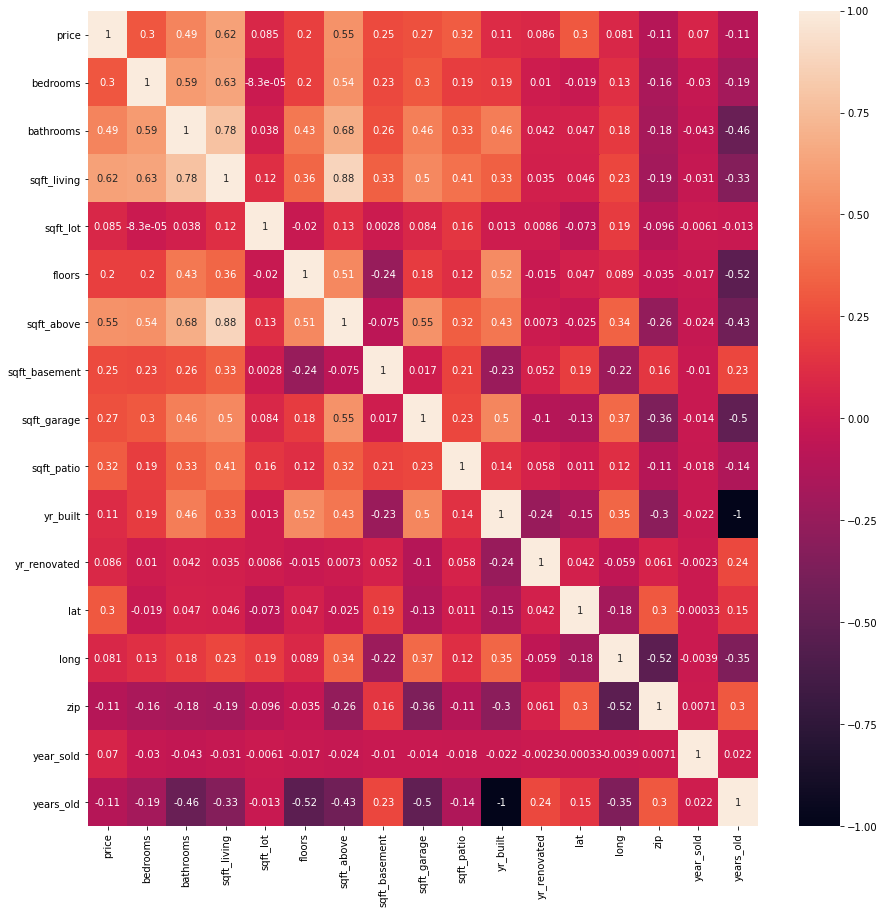

In [8]:
#plot the heatmap to determine correlations
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(hd.corr(), annot=True);

In [9]:
#list correlations
price_corrs = hd.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.620002
sqft_above       0.548982
bathrooms        0.491500
sqft_patio       0.318562
lat              0.298897
bedrooms         0.295287
sqft_garage      0.269071
sqft_basement    0.247261
floors           0.201785
years_old        0.107101
yr_built         0.107101
zip              0.106383
yr_renovated     0.085966
sqft_lot         0.084927
long             0.081069
year_sold        0.070285
Name: price, dtype: float64

## Simple Linear Regression - Baseline Model with Train-Test Split

In [10]:
# define variables for simple linear regression
y = hd['price']
X = hd.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# double check train-test split 
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 21873 rows and 26 columns
y_train is a Series with 21873 values


In [11]:
# select our best correlated predictor, as our X Train
baseline_X_train = X_train[['sqft_living']]

# Do the same for X Test
baseline_X_test = X_test[['sqft_living']]

# instantiate the baseline model
baseline_model = LinearRegression()

# Fit our model
baseline_model.fit(baseline_X_train, y_train)

# Get our R2 score
print('Base Training R2:', round(baseline_model.score(baseline_X_train, y_train), 4))
print('Base Test R2:', round(baseline_model.score(baseline_X_test, y_test), 4))
print()

# set up a validation model 
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=baseline_X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Validation Checks")
print("Baseline Model Train score:", round(baseline_scores["train_score"].mean(), 4))
print("Baseline Model Validation score:", round(baseline_scores["test_score"].mean(), 4))
print()

# Calculate predictions on training and test sets
train_preds = baseline_model.predict(baseline_X_train)
test_preds = baseline_model.predict(baseline_X_test)

# Calculate training and test MSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print('Train Root Mean Squared Error:', train_rmse)
print('Test Root Mean Squared Error:', test_rmse)
print('Difference in RMSE for Test/Train:', abs(round(test_rmse - train_rmse, 2)))

Base Training R2: 0.3878
Base Test R2: 0.3728

Validation Checks
Baseline Model Train score: 0.3755
Baseline Model Validation score: 0.4267

Train Root Mean Squared Error: 707035.2253083049
Test Root Mean Squared Error: 680256.0380789591
Difference in RMSE for Test/Train: 26779.19


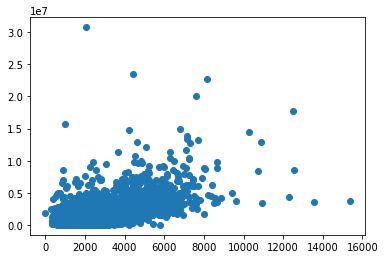

In [12]:
plt.scatter(x=hd["sqft_living"], y=hd["price"]);

## Polynomial Model

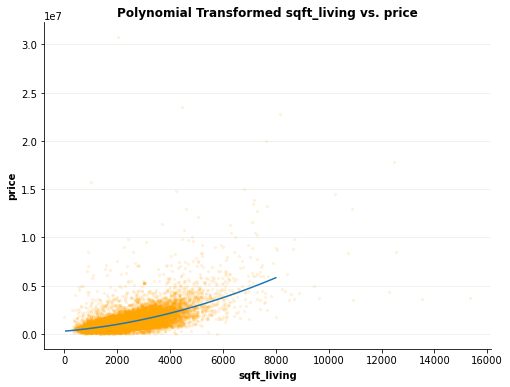

In [13]:
# fit and transform the X_train sqft_living column to a poly of 2
poly2 = PolynomialFeatures(2)
poly_sqft = poly2.fit_transform(X_train[['sqft_living']])

# instantiate a PolynomialFeatures and fit/transfrom to X_poly
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(baseline_X_train)

# fit X_poly to Linear Regression model 
reg_poly = LinearRegression().fit(X_poly, y_train)

# create line parameters 
X_linspace = pd.DataFrame(np.linspace(50, 8000, 50), columns= ['sqft_living'])

# create poly line X and Y values
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

# set up fig
fig, ax = plt.subplots(figsize=(8, 6))

# plot polynomial regression line against the data
plt.scatter(hd['sqft_living'], hd['price'], 
            s = 5, alpha = 0.1, 
            color='orange')

plt.plot(X_linspace, y_poly_pred)
plt.xlabel('sqft_living', weight = 'bold')
plt.ylabel('price', weight = 'bold')
ax.set_title('Polynomial Transformed sqft_living vs. price', weight = 'bold');

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show();

In [53]:
# instantiate a poly baseline model
poly_baseline_model = LinearRegression()

# Fit our poly model
poly_baseline_model.fit(X_poly, y_train)
poly_baseline_model.score(X_poly, y_train)

0.4124745956653505

## Add School Data

Data from https://data.wa.gov/education/Report-Card-Assessment-Data-2021-22-School-Year/v928-8kke and https://eds.ospi.k12.wa.us/directoryeds.aspx

In [15]:
#Import school data
rc = pd.read_csv("data/Report_Card_Assessment_Data_2021-22_School_Year.csv")
addresses=pd.read_csv("data/Washington_School_Directory_20230214.csv")

#Clean up Addresses dataframe
addresses["ZipCode"] = addresses["ZipCode"].apply(lambda x: x[:5])
non_waaddresses = addresses[~addresses['ZipCode'].isin(zips)]
addresses.drop(index = non_waaddresses.index, inplace = True, axis = 0)
addresses=addresses[["SchoolName", "ZipCode"]]

#Clean up Report Card dataframe

rc = rc[["OrganizationLevel", "County", "SchoolName", "GradeLevel", "TestSubject", "PercentMetStandard"]]
rc = rc[rc["County"] == "King"].drop(columns=["County"])
rc = rc[rc["OrganizationLevel"] == "School"].drop(columns=["OrganizationLevel"])
rc = rc[rc["GradeLevel"] == "All Grades"].drop(columns=["GradeLevel"])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
#Standardize data under percent met standard column
rc["PercentMetStandard"]=rc["PercentMetStandard"].replace("Suppressed: N<10", "0.0%")
rc["PercentMetStandard"]=rc["PercentMetStandard"].replace("No Students", "0.0%")
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip("%"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip(">"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip("<"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].astype(float)

#Average test scores and create a ratings column
rc = rc.groupby(["SchoolName"]).aggregate({"PercentMetStandard":"mean"}).sort_values(by=["SchoolName"]).reset_index()
rc["rating"] = rc["PercentMetStandard"]/10

In [17]:
#Join dataframes and remove excess columns
schools = rc.merge(addresses, left_on="SchoolName", right_on="SchoolName")
schools = schools[["SchoolName", "rating", "ZipCode"]]
schools["ZipCode"] = schools["ZipCode"].astype(int)

In [18]:
schools_dict = dict(zip(schools.ZipCode, round(schools.rating, 1)))

In [19]:
X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)

<ipython-input-19-a4b485f5a02c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)


In [20]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold,years_old,avg_school_quality
8411,3/10/2022,3,2.5,1300,825,2.0,NO,NO,NO,NONE,...,0,2008,0,"1127A 18th Ave, Seattle, Washington 98122, Uni...",47.611760,-122.309000,98122,2022,15,0.5
20884,7/26/2021,4,3.5,3180,8480,2.0,NO,NO,YES,NONE,...,240,1977,0,"5124 107th Avenue Northeast, Kirkland, Washing...",47.654335,-122.196871,98033,2021,46,5.5
11917,4/27/2022,3,2.0,1770,7544,1.0,NO,NO,NO,NONE,...,80,1977,0,"8902 Northeast 144th Street, Kirkland, Washing...",47.731640,-122.221600,98034,2022,46,0.6
12517,1/3/2022,5,3.5,2690,7200,2.0,NO,NO,NO,GOOD,...,400,1978,0,"14508 37th Avenue Northeast, Lake Forest Park,...",47.734060,-122.288075,98155,2022,45,3.4
14026,5/11/2022,5,3.0,3670,13794,1.0,NO,NO,NO,FAIR,...,1120,1972,0,"14236 Westwood Place Northeast, Seattle, Washi...",47.731990,-122.286080,98125,2022,51,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22318,1/22/2022,3,2.5,1950,7210,2.0,NO,NO,NO,NONE,...,110,1979,0,"5206 South 302nd Place, Auburn, Washington 980...",47.331160,-122.269130,98001,2022,44,0.6
5554,5/18/2022,4,2.5,2170,6408,1.0,NO,NO,NO,NONE,...,170,1981,0,"14008 81st Avenue Northeast, Kirkland, Washing...",47.726310,-122.233155,98034,2022,42,0.6
883,4/25/2022,3,2.5,1740,4277,2.0,NO,NO,NO,NONE,...,20,1992,0,"25760 Southeast 35th Place, Sammamish, Washing...",47.577610,-121.995820,98029,2022,31,5.1
16320,5/25/2022,3,2.5,3580,8500,1.0,NO,NO,NO,AVERAGE,...,380,1928,2008,"3817 Southwest Myrtle Street, Seattle, Washing...",47.539460,-122.381255,98126,2022,95,1.7


In [21]:
scale_mapper1 = {"NONE":0, "FAIR": 1, "AVERAGE":2, "GOOD":3, "EXCELLENT":4}
X_train["view"] = X_train["view"].replace(scale_mapper1)

scale_mapper2 = {"Poor":0, "Fair": 1, "Average":2, "Good":3, "Very Good":4}
X_train["condition"] = X_train["condition"].replace(scale_mapper2)

scale_mapper3 = {"1 Cabin":1, "2 Substandard": 2, "3 Poor":3, "4 Low":4, "5 Fair":5, 
               "6 Low Average":6, "7 Average": 7, "8 Good":8, "9 Better":9, "10 Very Good":10,
               "11 Excellent": 11, "12 Luxury":12, "13 Mansion":13 }
X_train["grade"] = X_train["grade"].replace(scale_mapper3)

<ipython-input-21-7dad008bcee4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["view"] = X_train["view"].replace(scale_mapper1)
<ipython-input-21-7dad008bcee4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["condition"] = X_train["condition"].replace(scale_mapper2)
<ipython-input-21-7dad008bcee4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [22]:
X_train = pd.get_dummies(X_train, columns = ['waterfront', 'greenbelt', 'nuisance'], drop_first = True)

In [23]:
X_train = X_train.drop(columns=["heat_source", "sewer_system", "address", "lat", "long"])

In [24]:
X_train.loc[X_train['avg_school_quality'].isna()] = X_train['avg_school_quality'].mean()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21873 entries, 8411 to 24469
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                21873 non-null  object 
 1   bedrooms            21873 non-null  float64
 2   bathrooms           21873 non-null  float64
 3   sqft_living         21873 non-null  float64
 4   sqft_lot            21873 non-null  float64
 5   floors              21873 non-null  float64
 6   view                21873 non-null  float64
 7   condition           21873 non-null  float64
 8   grade               21873 non-null  float64
 9   sqft_above          21873 non-null  float64
 10  sqft_basement       21873 non-null  float64
 11  sqft_garage         21873 non-null  float64
 12  sqft_patio          21873 non-null  float64
 13  yr_built            21873 non-null  float64
 14  yr_renovated        21873 non-null  float64
 15  zip                 21873 non-null  float64
 16  y

# All Variable Model

In [25]:
all_variable_X = X_train
all_variable_X = all_variable_X.drop(columns=["date", "year_sold"])

In [26]:
all_variable_model = sm.OLS(y_train, sm.add_constant(all_variable_X)).fit()
all_variable_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     1228.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:21:42   Log-Likelihood:            -3.2277e+05
No. Observations:               21873   AIC:                         6.456e+05
Df Residuals:                   21852   BIC:                         6.457e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.779e+06   2.05e+05    -18.478      0.000   -4.18e+06   -3.38e+06
bedrooms           -9.504e+04   5908.686    -16.085      0.000   -1.07e+05   -8.35e+04
bathrooms           9.986e+04   8623.116     11.580      0.000     8.3e+04    1.17e+05
sqft_living          163.8816     19.655      8.338      0.000     125.357     202.407
sqft_lot              -0.0562      0.071     -0.796      0.426      -0.195       0.082
floors             -9.893e+04    1.1e+04     -8.983      0.000   -1.21e+05   -7.73e+04
view                  7.4e+04   5809.655     12.737      0.000    6.26e+04    8.54e+04
condition           2.663e+04   6663.703      3.996      0.000    1.36e+04    3.97e+04
grade                 2.3e+05   6307.392     36.472      0.000    2.18e+05    2.42e+05
sqft_above           249.4022     19.941     12.507      0.000     210.317     288.487
sqft_basement        106.4182     14.725      7.227      0.000      77.557     135.279
sqft_garage         -195.9516     21.068     -9.301      0.000    -237.247    -154.657
sqft_patio            78.8545     19.569      4.030      0.000      40.498     117.211
yr_built            1.342e+04   4379.448      3.065      0.002    4837.396     2.2e+04
yr_renovated          17.6045     10.709      1.644      0.100      -3.386      38.595
zip                 -256.6468     90.121     -2.848      0.004    -433.290     -80.004
years_old           1.726e+04   4426.581      3.898      0.000    8580.287    2.59e+04
avg_school_quality  8.944e+04   2652.234     33.723      0.000    8.42e+04    9.46e+04
waterfront_YES      9.485e+05   3.57e+04     26.548      0.000    8.78e+05    1.02e+06
greenbelt_YES       2.971e+04   2.66e+04      1.116      0.264   -2.25e+04    8.19e+04
nuisance_YES        4.523e+04   1.14e+04      3.971      0.000    2.29e+04    6.76e+04
==============================================================================
Omnibus:                    34378.568   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         74487111.732
Skew:                           9.556   Prob(JB):                         0.00
Kurtosis:                     288.246   Cond. No.                     4.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#add requirements for our stakeholder
hd = hd.loc[(hd["bedrooms"] > 1) & (hd["bedrooms"]<=5)]
hd = hd.loc[hd["price"]<=1300000]
hd = hd.drop(columns=["date"])

# Recursive Feature Elimination Model

In [27]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 5)

In [28]:
select.fit(X = all_variable_X, y = y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [29]:
select.ranking_

array([ 8,  1,  9, 16,  1,  1,  6,  1, 12, 13, 11, 14,  7, 15, 10,  4,  3,
        1,  2,  5])

In [30]:
all_variable_X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'zip', 'years_old',
       'avg_school_quality', 'waterfront_YES', 'greenbelt_YES',
       'nuisance_YES'],
      dtype='object')

In [31]:
pd.DataFrame(data=select.ranking_, index=all_variable_X.columns)

,0
bedrooms,8
bathrooms,1
sqft_living,9
sqft_lot,16
floors,1
view,1
condition,6
grade,1
sqft_above,12
sqft_basement,13


In [32]:
rfe_X = all_variable_X[['bathrooms', 'floors', 'grade', 'avg_school_quality', 'greenbelt_YES', 'waterfront_YES']]
all_variable_model = sm.OLS(y_train, sm.add_constant(rfe_X)).fit()
all_variable_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     2891.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:21:42   Log-Likelihood:            -3.2462e+05
No. Observations:               21873   AIC:                         6.493e+05
Df Residuals:                   21866   BIC:                         6.493e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.146e+06   3.18e+04    -67.376      0.000   -2.21e+06   -2.08e+06
bathrooms           2.099e+05   6874.544     30.532      0.000    1.96e+05    2.23e+05
floors             -2.024e+05   9620.032    -21.038      0.000   -2.21e+05   -1.84e+05
grade               3.574e+05   5439.724     65.699      0.000    3.47e+05    3.68e+05
avg_school_quality  1.029e+05   2812.155     36.594      0.000    9.74e+04    1.08e+05
greenbelt_YES      -1.935e+05   2.56e+04     -7.566      0.000   -2.44e+05   -1.43e+05
waterfront_YES      1.074e+06   2.92e+04     36.731      0.000    1.02e+06    1.13e+06
==============================================================================
Omnibus:                    32761.527   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46528639.047
Skew:                           8.774   Prob(JB):                         0.00
Kurtosis:                     228.267   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation

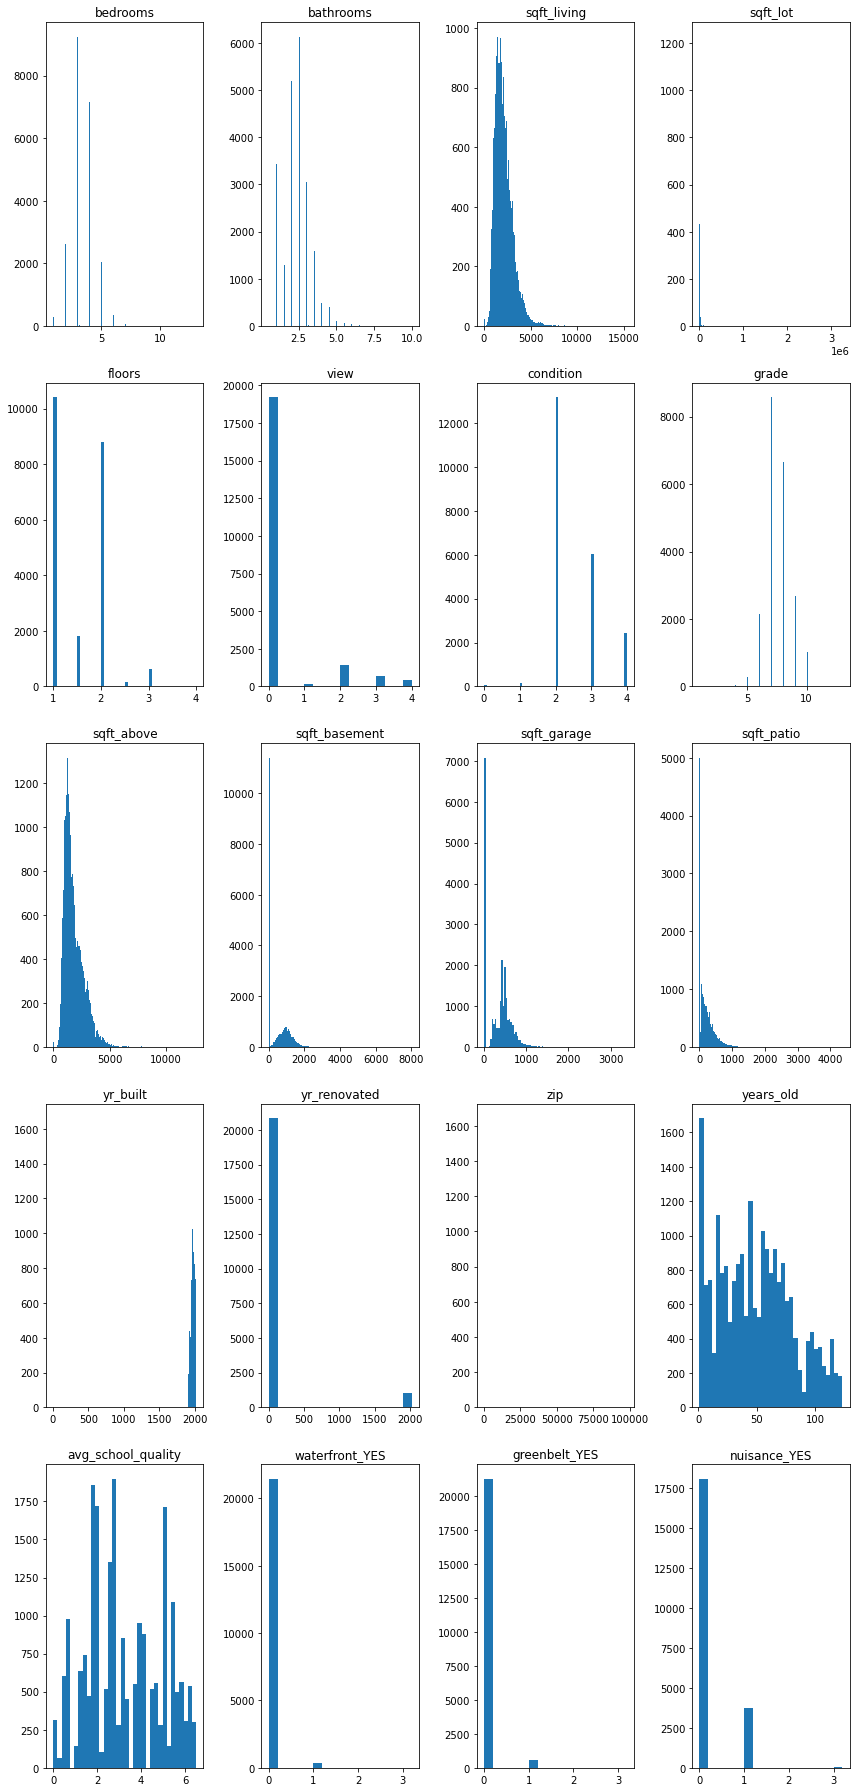

In [33]:
# set up figure for predictor variables in all_variable_X
fig, axes = plt.subplots(nrows=(all_variable_X.shape[1] // 4), ncols=4, figsize=(12,25))

# for each col in X_third, plot distribution
for col, ax in zip(all_variable_X, axes.flatten()):
    ax.hist(all_variable_X[col], bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

In [34]:
#selecting variables for log
log_variables = ['sqft_living','sqft_above', 'years_old','bathrooms', 'bedrooms']

# assign to X_cont
X_logs = all_variable_X[log_variables]

In [35]:
X_logs

,sqft_living,sqft_above,years_old,bathrooms,bedrooms
8411,1300.0,880.0,15.0,2.5,3.0
20884,3180.0,3180.0,46.0,3.5,4.0
11917,1770.0,1290.0,46.0,2.0,3.0
12517,2690.0,1720.0,45.0,3.5,5.0
14026,3670.0,2010.0,51.0,3.0,5.0
...,...,...,...,...,...
22318,1950.0,1950.0,44.0,2.5,3.0
5554,2170.0,1440.0,42.0,2.5,4.0
883,1740.0,1740.0,31.0,2.5,3.0
16320,3580.0,2000.0,95.0,2.5,3.0


In [36]:
X_logs.describe()

,sqft_living,sqft_above,years_old,bathrooms,bedrooms
count,21873.000000,21873.000000,21873.000000,21873.000000,21873.000000
mean,2132.474393,1828.404169,49.189612,2.336231,3.441064
std,984.050568,886.548112,31.675997,0.895916,0.971822
min,3.000000,2.000000,1.000000,0.500000,1.000000
25%,1440.000000,1190.000000,22.000000,2.000000,3.000000
50%,1950.000000,1580.000000,47.000000,2.500000,3.000000
75%,2630.000000,2300.000000,71.000000,3.000000,4.000000
max,15360.000000,12660.000000,123.000000,10.000000,13.000000


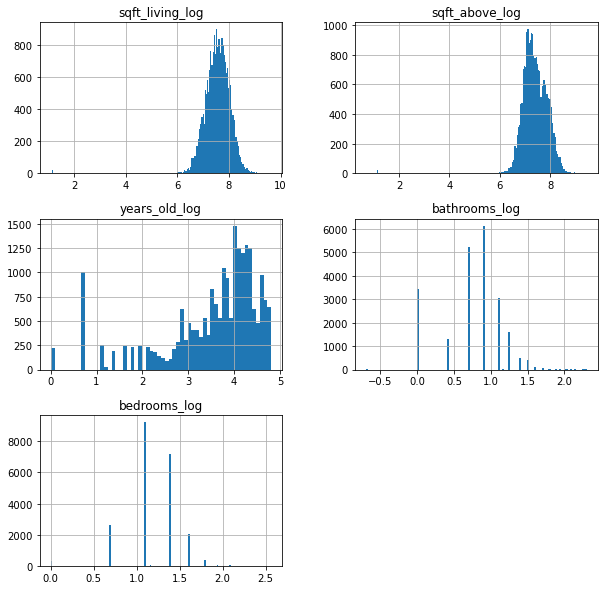

In [37]:
#log transformation
log_columns = [f'{column}_log' for column in X_logs.columns]
cont_log = np.log(X_logs)
cont_log.columns = log_columns
cont_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

In [38]:
cont_log

,sqft_living_log,sqft_above_log,years_old_log,bathrooms_log,bedrooms_log
8411,7.170120,6.779922,2.708050,0.916291,1.098612
20884,8.064636,8.064636,3.828641,1.252763,1.386294
11917,7.478735,7.162397,3.828641,0.693147,1.098612
12517,7.897296,7.450080,3.806662,1.252763,1.609438
14026,8.207947,7.605890,3.931826,1.098612,1.609438
...,...,...,...,...,...
22318,7.575585,7.575585,3.784190,0.916291,1.098612
5554,7.682482,7.272398,3.737670,0.916291,1.386294
883,7.461640,7.461640,3.433987,0.916291,1.098612
16320,8.183118,7.600902,4.553877,0.916291,1.098612


In [39]:
log_transformed = cont_log.join(all_variable_X).drop(columns = ["sqft_living", "sqft_above", "sqft_lot", 'years_old',
                                                                'bathrooms', 'bedrooms', "yr_renovated", "yr_built", 
                                                                "sqft_basement", "sqft_garage", "sqft_patio"])
log_transformed

,sqft_living_log,sqft_above_log,years_old_log,bathrooms_log,bedrooms_log,floors,view,condition,grade,zip,avg_school_quality,waterfront_YES,greenbelt_YES,nuisance_YES
8411,7.170120,6.779922,2.708050,0.916291,1.098612,2.0,0.0,2.0,8.0,98122.0,0.5,0.0,0.0,0.0
20884,8.064636,8.064636,3.828641,1.252763,1.386294,2.0,0.0,3.0,8.0,98033.0,5.5,0.0,0.0,1.0
11917,7.478735,7.162397,3.828641,0.693147,1.098612,1.0,0.0,2.0,8.0,98034.0,0.6,0.0,0.0,0.0
12517,7.897296,7.450080,3.806662,1.252763,1.609438,2.0,3.0,2.0,9.0,98155.0,3.4,0.0,0.0,0.0
14026,8.207947,7.605890,3.931826,1.098612,1.609438,1.0,1.0,2.0,9.0,98125.0,3.7,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22318,7.575585,7.575585,3.784190,0.916291,1.098612,2.0,0.0,3.0,7.0,98001.0,0.6,0.0,0.0,0.0
5554,7.682482,7.272398,3.737670,0.916291,1.386294,1.0,0.0,2.0,8.0,98034.0,0.6,0.0,0.0,0.0
883,7.461640,7.461640,3.433987,0.916291,1.098612,2.0,0.0,3.0,8.0,98029.0,5.1,0.0,0.0,0.0
16320,8.183118,7.600902,4.553877,0.916291,1.098612,1.0,2.0,2.0,8.0,98126.0,1.7,0.0,0.0,0.0


In [40]:
log_y = np.log(y_train)

In [41]:
log_model = sm.OLS(log_y, sm.add_constant(log_transformed)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1826.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:22:09   Log-Likelihood:                -10785.
No. Observations:               21873   AIC:                         2.160e+04
Df Residuals:                   21858   BIC:                         2.172e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.3561      0.128     80.951      0.000      10.105      10.607
sqft_living_log        0.3739      0.017     21.642      0.000       0.340       0.408
sqft_above_log        -0.0051      0.014     -0.358      0.721      -0.033       0.023
years_old_log          0.0603      0.003     17.545      0.000       0.054       0.067
bathrooms_log          0.0799      0.011      7.046      0.000       0.058       0.102
bedrooms_log          -0.0823      0.013     -6.443      0.000      -0.107      -0.057
floors                 0.0227      0.007      3.247      0.001       0.009       0.036
view                   0.0607      0.004     16.754      0.000       0.054       0.068
condition              0.0398      0.004      9.673      0.000       0.032       0.048
grade                  0.1825      0.004     48.298      0.000       0.175       0.190
zip                -1.455e-05   1.52e-06     -9.540      0.000   -1.75e-05   -1.16e-05
avg_school_quality     0.0888      0.002     53.384      0.000       0.085       0.092
waterfront_YES         0.2385      0.023     10.500      0.000       0.194       0.283
greenbelt_YES          0.0861      0.017      5.079      0.000       0.053       0.119
nuisance_YES           0.0263      0.007      3.634      0.000       0.012       0.040
==============================================================================
Omnibus:                     6211.357   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80300.630
Skew:                          -1.000   Prob(JB):                         0.00
Kurtosis:                      12.171   Cond. No.                     4.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## One Hot Encode Zip Codes

In [42]:
log_transformed_zips = pd.get_dummies(log_transformed, columns = ['zip'], drop_first = True)
log_transformed_zips.columns

Index(['sqft_living_log', 'sqft_above_log', 'years_old_log', 'bathrooms_log',
       'bedrooms_log', 'floors', 'view', 'condition', 'grade',
       'avg_school_quality', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'zip_98001.0', 'zip_98002.0', 'zip_98003.0', 'zip_98004.0',
       'zip_98005.0', 'zip_98006.0', 'zip_98007.0', 'zip_98008.0',
       'zip_98010.0', 'zip_98011.0', 'zip_98014.0', 'zip_98019.0',
       'zip_98022.0', 'zip_98023.0', 'zip_98024.0', 'zip_98027.0',
       'zip_98028.0', 'zip_98029.0', 'zip_98030.0', 'zip_98031.0',
       'zip_98032.0', 'zip_98033.0', 'zip_98034.0', 'zip_98038.0',
       'zip_98039.0', 'zip_98040.0', 'zip_98042.0', 'zip_98045.0',
       'zip_98047.0', 'zip_98051.0', 'zip_98052.0', 'zip_98053.0',
       'zip_98055.0', 'zip_98056.0', 'zip_98057.0', 'zip_98058.0',
       'zip_98059.0', 'zip_98065.0', 'zip_98070.0', 'zip_98072.0',
       'zip_98074.0', 'zip_98075.0', 'zip_98077.0', 'zip_98092.0',
       'zip_98102.0', 'zip_98103.0', 'zip_

In [43]:
log_zips_model = sm.OLS(log_y, sm.add_constant(log_transformed_zips)).fit()
log_zips_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     613.5
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:22:09   Log-Likelihood:                -5803.6
No. Observations:               21873   AIC:                         1.178e+04
Df Residuals:                   21786   BIC:                         1.248e+04
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.2701      0.099    103.238      0.000      10.075      10.465
sqft_living_log        0.2496      0.014     17.742      0.000       0.222       0.277
sqft_above_log         0.2405      0.013     18.871      0.000       0.216       0.266
years_old_log         -0.0054      0.003     -1.820      0.069      -0.011       0.000
bathrooms_log          0.0637      0.009      6.971      0.000       0.046       0.082
bedrooms_log          -0.0355      0.010     -3.436      0.001      -0.056      -0.015
floors                -0.0694      0.006    -11.113      0.000      -0.082      -0.057
view                   0.0680      0.003     22.734      0.000       0.062       0.074
condition              0.0592      0.003     17.728      0.000       0.053       0.066
grade                  0.0952      0.003     29.499      0.000       0.089       0.102
avg_school_quality     0.2606      0.002    116.753      0.000       0.256       0.265
waterfront_YES         0.3110      0.018     16.847      0.000       0.275       0.347
greenbelt_YES          0.0583      0.014      4.183      0.000       0.031       0.086
nuisance_YES          -0.0378      0.006     -6.434      0.000      -0.049      -0.026
zip_98001.0           -1.5711      0.120    -13.064      0.000      -1.807      -1.335
zip_98002.0           -1.9547      0.122    -16.086      0.000      -2.193      -1.716
zip_98003.0           -1.9801      0.121    -16.303      0.000      -2.218      -1.742
zip_98004.0           -1.4277      0.125    -11.447      0.000      -1.672      -1.183
zip_98005.0           -1.6866      0.126    -13.386      0.000      -1.934      -1.440
zip_98006.0           -2.1050      0.124    -17.021      0.000      -2.347      -1.863
zip_98007.0           -1.3080      0.124    -10.559      0.000      -1.551      -1.065
zip_98008.0           -1.8906      0.124    -15.303      0.000      -2.133      -1.648
zip_98010.0           -2.4785      0.124    -19.961      0.000      -2.722      -2.235
zip_98011.0           -1.4971      0.123    -12.145      0.000      -1.739      -1.256
zip_98014.0           -2.1562      0.126    -17.148      0.000      -2.403      -1.910
zip_98019.0           -2.0239      0.124    -16.301      0.000      -2.267      -1.781
zip_98022.0           -1.9196      0.122    -15.720      0.000      -2.159      -1.680
zip_98023.0           -2.2835      0.122    -18.729      0.000      -2.522      -2.045
zip_98024.0           -2.3324      0.128    -18.214      0.000      -2.583      -2.081
zip_98027.0           -1.9985      0.123    -16.228      0.000      -2.240      -1.757
zip_98028.0           -2.5543      0.125    -20.362      0.000      -2.800      -2.308
zip_98029.0           -2.0585      0.124    -16.575      0.000      -2.302      -1.815
zip_98030.0           -1.7946      0.1

In [44]:
zips_ohe = pd.get_dummies(log_transformed['zip'], drop_first = True)
zips_school = zips_ohe.mul(log_transformed_zips['avg_school_quality'], axis = 0)

In [45]:
zips_school_interaction = pd.merge(zips_school, 
                                   log_transformed_zips[['sqft_living_log', 'sqft_above_log',
                                                                      'years_old_log', 'bathrooms_log',
                                                                      'bedrooms_log', 'floors', 'view',
                                                                      'condition', 'grade','waterfront_YES',
                                                                      'greenbelt_YES', 'nuisance_YES']], 
                                   how = 'inner', left_on = zips_school.index, right_on = log_transformed_zips.index)
#zips_school_interaction
zips_school_interaction=zips_school_interaction.rename(columns={'key_0': 'index'})

# zips_school_interaction.rename(index={'key_0': 'index'})
zips_school_interaction.set_index('index', inplace = True)

In [46]:
zips_school_interaction


,98001.0,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,...,years_old_log,bathrooms_log,bedrooms_log,floors,view,condition,grade,waterfront_YES,greenbelt_YES,nuisance_YES
index,,,,,,,,,,,,,,,,,,,,,
8411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.708050,0.916291,1.098612,2.0,0.0,2.0,8.0,0.0,0.0,0.0
20884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.828641,1.252763,1.386294,2.0,0.0,3.0,8.0,0.0,0.0,1.0
11917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.828641,0.693147,1.098612,1.0,0.0,2.0,8.0,0.0,0.0,0.0
12517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.806662,1.252763,1.609438,2.0,3.0,2.0,9.0,0.0,0.0,0.0
14026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.931826,1.098612,1.609438,1.0,1.0,2.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22318,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.784190,0.916291,1.098612,2.0,0.0,3.0,7.0,0.0,0.0,0.0
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.737670,0.916291,1.386294,1.0,0.0,2.0,8.0,0.0,0.0,0.0
883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.433987,0.916291,1.098612,2.0,0.0,3.0,8.0,0.0,0.0,0.0


In [47]:
interaction_model = sm.OLS(log_y, sm.add_constant(zips_school_interaction)).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     615.7
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:22:09   Log-Likelihood:                -5958.3
No. Observations:               21873   AIC:                         1.209e+04
Df Residuals:                   21788   BIC:                         1.277e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.5859      0.056    170.282      0.000       9.476       9.696
98001.0            -0.2384      0.039     -6.146      0.000      -0.314      -0.162
98002.0            -0.1208      0.014     -8.340      0.000      -0.149      -0.092
98003.0            -0.0955      0.013     -7.635      0.000      -0.120      -0.071
98004.0             0.2298      0.006     41.301      0.000       0.219       0.241
98005.0             0.1713      0.007     23.162      0.000       0.157       0.186
98006.0             0.1095      0.004     25.261      0.000       0.101       0.118
98007.0             0.2435      0.014     17.124      0.000       0.216       0.271
98008.0             0.1295      0.005     23.741      0.000       0.119       0.140
98010.0            -0.0082      0.006     -1.306      0.191      -0.020       0.004
98011.0             0.1759      0.011     15.833      0.000       0.154       0.198
98014.0             0.0450      0.009      5.261      0.000       0.028       0.062
98019.0             0.0629      0.008      8.050      0.000       0.048       0.078
98022.0            -0.0596      0.013     -4.733      0.000      -0.084      -0.035
98023.0            -0.0570      0.007     -8.029      0.000      -0.071      -0.043
98024.0             0.0722      0.007     10.486      0.000       0.059       0.086
98027.0             0.0929      0.006     15.669      0.000       0.081       0.104
98028.0             0.0541      0.004     12.740      0.000       0.046       0.062
98029.0             0.1046      0.005     19.303      0.000       0.094       0.115
98030.0            -0.0885      0.018     -5.038      0.000      -0.123      -0.054
98031.0            -0.0409      0.010     -4.087      0.000      -0.061      -0.021
98032.0            -0.0547      0.019     -2.882      0.004      -0.092      -0.018
98033.0             0.1534      0.004     35.748      0.000       0.145       0.162
98034.0             0.8518      0.038     22.399      0.000       0.777       0.926
98038.0             0.0110      0.008      1.347      0.178      -0.005       0.027
98039.0             0.2223      0.008     29.160      0.000       0.207       0.237
98040.0             0.1312      0.004     29.851      0.000       0.123       0.140
98042.0            -0.0199      0.004     -4.574      0.000      -0.028      -0.011
98045.0             0.0696      0.009      7.522      0.000       0.051       0.088
98047.0            -0.0499      0.013     -3.699      0.000      -0.076      -0.023
98051.0             0.0405      0.016      2.517      0.012       0.009       0.072
98052.0             0.1409      0.005     27.271      0.000       0.131       0.151
98053.0             0.1238      0.006     19.281      0.000       0.111       0.136
98055.0             0.0017      0.007      0.241      0.809

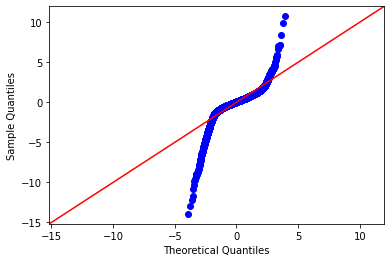

In [48]:
sm.graphics.qqplot(interaction_model.resid, dist=stats.norm, line='45', fit=True)
plt.show()

## Business Question
Considering family homes (2-5 bedrooms) under $1.3 million, how can we maximize school quality and minimize house price?